In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# read in all our data
fb_data = pd.read_csv("/content/drive/MyDrive/Facebook_data.csv")

# set seed for reproducibility
np.random.seed(0) 

In [2]:
fb_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/16/2021,$341.16,11026090.0,$344.91,$345.9899,$340.14
1,07/15/2021,$344.46,14781590.0,$349.2348,$349.2348,$340.22
2,07/14/2021,$347.63,13894220.0,$354.56,$355.2,$346.73
3,07/13/2021,$352.09,11455960.0,$351.5,$358.49,$348.8
4,07/12/2021,$353.16,10018620.0,$351.23,$354.19,$349.64


In [3]:
# get the number of missing data points per column
mis_val_count = fb_data.isnull().sum()

# look at the # of missing points in the columns
mis_val_count[:]

Date          0
Close/Last    0
Volume        1
Open          1
High          1
Low           1
dtype: int64

In [4]:
# how many total missing values do we have?
total_cells = np.product(fb_data.shape)
total_missing = mis_val_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.052910052910052914


In [5]:
#as the percentage of missing values is very less we will drop those rows 
fb_data= fb_data.dropna()

In [6]:
# get the number of missing data points per column
mis_val_count = fb_data.isnull().sum()

# look at the # of missing points in the columns
mis_val_count[:]

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [7]:
fb_data.set_index("Date", inplace= True)
fb_data.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
07/16/2021,$341.16,11026090.0,$344.91,$345.9899,$340.14
07/15/2021,$344.46,14781590.0,$349.2348,$349.2348,$340.22
07/14/2021,$347.63,13894220.0,$354.56,$355.2,$346.73
07/13/2021,$352.09,11455960.0,$351.5,$358.49,$348.8
07/12/2021,$353.16,10018620.0,$351.23,$354.19,$349.64


In [8]:
fb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 07/16/2021 to 07/18/2016
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  1259 non-null   object 
 1   Volume      1259 non-null   float64
 2   Open        1259 non-null   object 
 3   High        1259 non-null   object 
 4   Low         1259 non-null   object 
dtypes: float64(1), object(4)
memory usage: 59.0+ KB


In [9]:
#removing $ symbol
fb_data['Close/Last']=fb_data['Close/Last'].map(lambda x:str(x).strip("$") if '$' in str(x) else str(x))
fb_data['Open']=fb_data['Open'].map(lambda x:str(x).strip("$") if '$' in str(x) else str(x))
fb_data['High']=fb_data['High'].map(lambda x:str(x).strip("$") if '$' in str(x) else str(x))
fb_data['Low']=fb_data['Low'].map(lambda x:str(x).strip("$") if '$' in str(x) else str(x))


In [10]:
fb_data.head()


,Close/Last,Volume,Open,High,Low
Date,,,,,
07/16/2021,341.16,11026090.0,344.91,345.9899,340.14
07/15/2021,344.46,14781590.0,349.2348,349.2348,340.22
07/14/2021,347.63,13894220.0,354.56,355.2,346.73
07/13/2021,352.09,11455960.0,351.5,358.49,348.8
07/12/2021,353.16,10018620.0,351.23,354.19,349.64


In [11]:
fb_data['Close/Last'] =fb_data['Close/Last'] .astype(str).astype(float)
fb_data['Open']=fb_data['Open'].astype(str).astype(float)
fb_data['High']=fb_data['High'].astype(str).astype(float)
fb_data['Low']=fb_data['Low'].astype(str).astype(float)

In [12]:
fb_data.head()
fb_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 07/16/2021 to 07/18/2016
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  1259 non-null   float64
 1   Volume      1259 non-null   float64
 2   Open        1259 non-null   float64
 3   High        1259 non-null   float64
 4   Low         1259 non-null   float64
dtypes: float64(5)
memory usage: 59.0+ KB


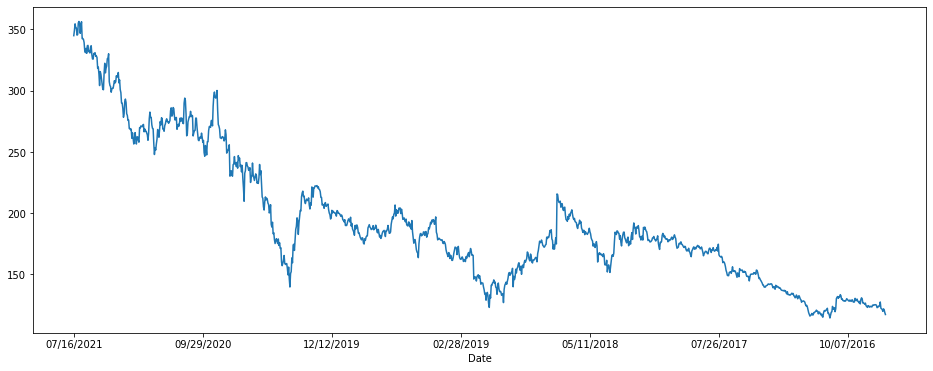

In [13]:
fb_data['Open'].plot(figsize=(16,6))

In [14]:
fb_data.rolling(7).mean().head(20)

,Close/Last,Volume,Open,High,Low
Date,,,,,
07/16/2021,NaN,NaN,NaN,NaN,NaN
07/15/2021,NaN,NaN,NaN,NaN,NaN
07/14/2021,NaN,NaN,NaN,NaN,NaN
07/13/2021,NaN,NaN,NaN,NaN,NaN
07/12/2021,NaN,NaN,NaN,NaN,NaN
07/09/2021,NaN,NaN,NaN,NaN,NaN
07/08/2021,347.795714,1.265738e+07,348.926400,351.734957,344.765000
07/07/2021,349.128571,1.311349e+07,350.404971,353.234971,346.173571
07/06/2021,350.317143,1.292875e+07,351.442857,354.600000,347.453571


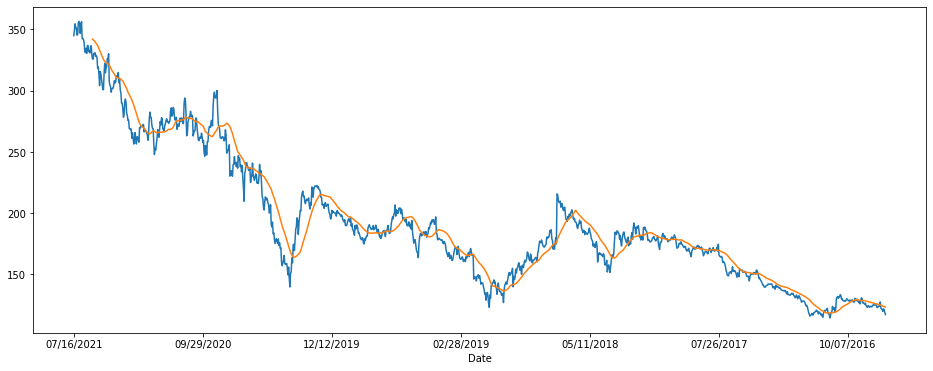

In [15]:
fb_data['Open'].plot(figsize=(16,6))
fb_data.rolling(window=30).mean()['Close/Last'].plot()

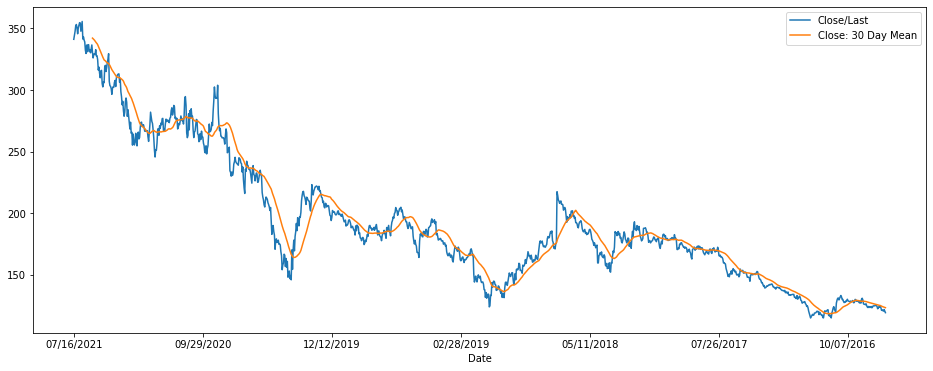

In [16]:
fb_data['Close: 30 Day Mean']=fb_data['Close/Last'].rolling(window=30).mean()
fb_data[['Close/Last', 'Close: 30 Day Mean']].plot(figsize=(16,6))

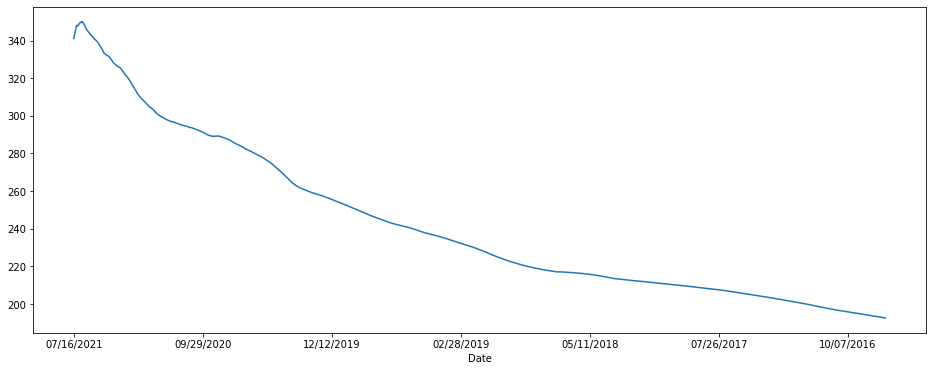

In [17]:
#minimum number pof periods
fb_data['Close/Last'].expanding(min_periods=1).mean().plot(figsize=(16,6))

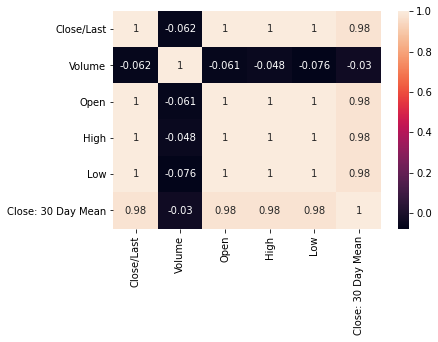

In [18]:
import seaborn as sns
correlation = fb_data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [19]:
training_set=fb_data['Open']
training_set=pd.DataFrame(training_set)

In [20]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
training_set_scaled= sc.fit_transform(training_set)

In [21]:
X_train=[]
y_train=[]
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train= np.array(X_train), np.array(y_train)

X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [22]:
#Building RNN

from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [23]:
regressor=Sequential()

In [25]:
regressor.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [26]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 [==============================] - 27s 104ms/step - loss: 0.0362
Epoch 2/50
38/38 [==============================] - 4s 105ms/step - loss: 0.0049
Epoch 3/50
38/38 [==============================] - 4s 108ms/step - loss: 0.0046
Epoch 4/50
38/38 [==============================] - 4s 104ms/step - loss: 0.0039
Epoch 5/50
38/38 [==============================] - 4s 107ms/step - loss: 0.0031
Epoch 6/50
38/38 [==============================] - 4s 106ms/step - loss: 0.0032
Epoch 7/50
38/38 [==============================] - 4s 104ms/step - loss: 0.0029
Epoch 8/50
38/38 [==============================] - 4s 108ms/step - loss: 0.0027
Epoch 9/50
38/38 [==============================] - 4s 105ms/step - loss: 0.0027
Epoch 10/50
38/38 [==============================] - 4s 105ms/step - loss: 0.0022
Epoch 11/50
38/38 [==============================] - 4s 105ms/step - loss: 0.0024
Epoch 12/50
38/38 [==============================] - 4s 104ms/step - loss: 0.0024
Epoch 13/50
38/38 [=====

In [27]:
data_test= fb_data

In [28]:
real_stock_price =data_test.iloc[:,1:2].values

In [29]:
data_test.head()

,Close/Last,Volume,Open,High,Low,Close: 30 Day Mean
Date,,,,,,
07/16/2021,341.16,11026090.0,344.9100,345.9899,340.14,NaN
07/15/2021,344.46,14781590.0,349.2348,349.2348,340.22,NaN
07/14/2021,347.63,13894220.0,354.5600,355.2000,346.73,NaN
07/13/2021,352.09,11455960.0,351.5000,358.4900,348.80,NaN
07/12/2021,353.16,10018620.0,351.2300,354.1900,349.64,NaN


In [30]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 07/16/2021 to 07/18/2016
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Close/Last          1259 non-null   float64
 1   Volume              1259 non-null   float64
 2   Open                1259 non-null   float64
 3   High                1259 non-null   float64
 4   Low                 1259 non-null   float64
 5   Close: 30 Day Mean  1230 non-null   float64
dtypes: float64(6)
memory usage: 108.9+ KB


In [31]:
test_set=data_test['Open']
test_set= pd.DataFrame(test_set)

In [33]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 07/16/2021 to 07/18/2016
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1259 non-null   float64
dtypes: float64(1)
memory usage: 59.7+ KB


In [34]:
data_total = pd.concat((fb_data['Open'], data_test['Open']), axis=0)
inputs =data_total[len(data_total)-len(data_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs= sc.transform(inputs)
X_test=[]
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test= np.array(X_test)
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price= regressor.predict(X_test)
predicted_price= sc.inverse_transform(predicted_price)

In [35]:
predicted_price= pd.DataFrame(predicted_price)
predicted_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


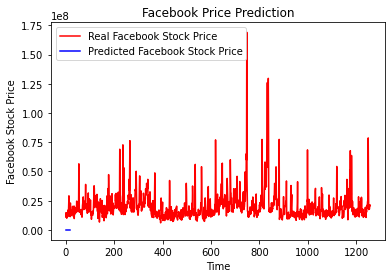

In [36]:
  plt.plot(real_stock_price, color='red', label= 'Real Facebook Stock Price')
  plt.plot(predicted_price, color='blue', label='Predicted Facebook Stock Price')
  plt.title('Facebook Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Facebook Stock Price')
  plt.legend()
  plt.show()